Hypothesis: Neap tides continue to experience the significant temperature gradient in Georges Bank
* If true, then the tidal variations can only strengthen, but not cause, the FLC events

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime
import pandas as pd
import glob

In [2]:
sst_path = "OISST_data/"

In [3]:
ds_name = "OISST_data/oisst-avhrr-v02r01.20230902.nc"

In [4]:
ds = xr.open_dataset(ds_name)

In [5]:
date = ds_name[30:38]

In [6]:
#--- Filter to the Georges Bank region
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 47

ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon+360,max_lon+360))

Defining the region of interest (Georges Bank, ROI) and the region of comparison (ROC)

In [7]:
roi_lon1 = -70.25  # Western longitude of the ROI
roi_lon2 = -68.75  # Eastern longitude of the ROI
roi_lat1 = 40.75   # Southern latitude of the ROI
roi_lat2 = 41.5    # Northern latitude of the ROI

roc_lon1 = -70.25  # Western longitude of the ROI
roc_lon2 = -68.75  # Eastern longitude of the ROI
roc_lat1 = 41.5   # Southern latitude of the ROI
roc_lat2 = 43.5    # Northern latitude of the ROI

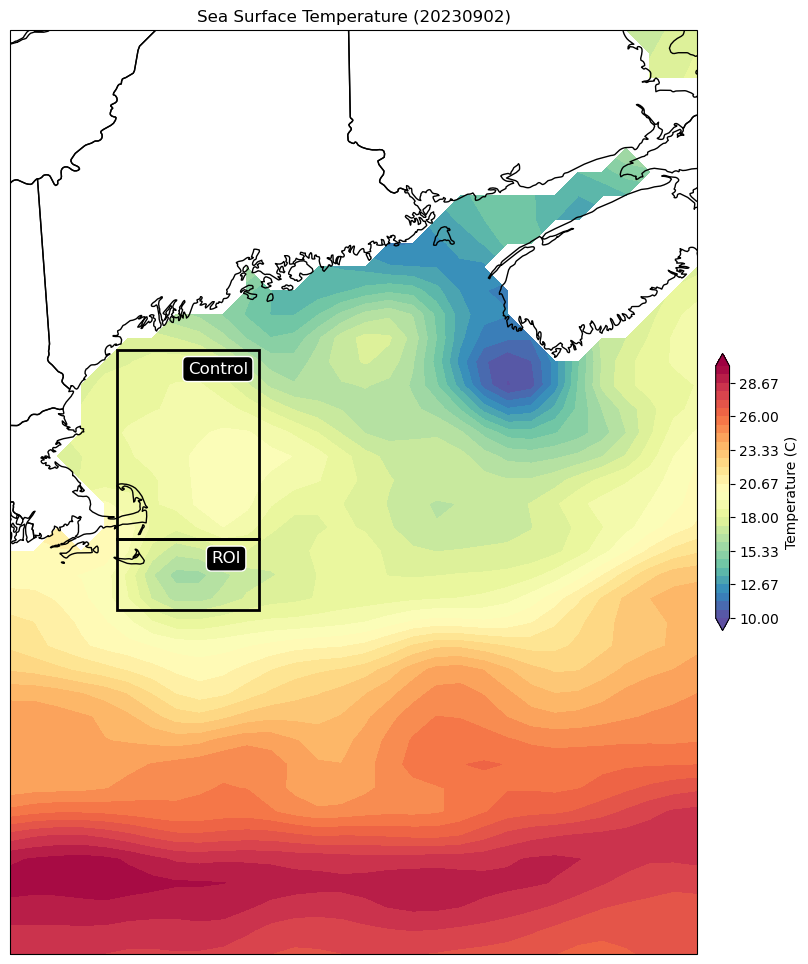

In [8]:
roi_box = mpatches.Rectangle(
    xy=(roi_lon1, roi_lat1),
    width=roi_lon2 - roi_lon1,
    height=roi_lat2 - roi_lat1,
    fill=False,
    edgecolor='black',
    linewidth=2.0,
    transform=ccrs.PlateCarree()
)

roc_box = mpatches.Rectangle(
    xy=(roc_lon1, roc_lat1),
    width=roc_lon2 - roc_lon1,
    height=roc_lat2 - roc_lat1,
    fill=False,
    edgecolor='black',
    linewidth=2.0,
    transform=ccrs.PlateCarree()
)

projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(10, 30, 31)

c=ax.contourf(ds.lon, ds.lat, ds.sst[0][0], cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Sea Surface Temperature ('+date+')')
clb.set_label('Temperature (C)')
ax.add_patch(roi_box)
ax.add_patch(roc_box)

label_text_roi = "ROI"
ax.annotate(label_text_roi, xy=(roi_lon1, roi_lat1), xytext=(roi_lon2 - 0.5, roi_lat2 - 0.25), color='white',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="black"))
label_text_roc = "Control"
ax.annotate(label_text_roc, xy=(roc_lon1, roc_lat1), xytext=(roc_lon2 - 0.75, roc_lat2 - 0.25), color='white',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="black"))

ax.add_feature(cfeature.STATES)

Comparing the neap tide Georges Bank effect to the spring tide Georges Bank effect

Dates of the spring and neap tides of 2023

In [9]:
dt1 = datetime(2023, 9, 17, 0, 0, 0)
dt2 = datetime(2023, 9, 9, 0, 0, 0)
dt3 = datetime(2023, 9, 2, 0, 0, 0)
dt4 = datetime(2023, 8, 26, 0, 0, 0)
dt5 = datetime(2023, 8, 18, 0, 0, 0)
dt6 = datetime(2023, 8, 11, 0, 0, 0)
dt7 = datetime(2023, 8, 4, 0, 0, 0)
dt8 = datetime(2023, 7, 27, 0, 0, 0)
dt9 = datetime(2023, 7, 19, 0, 0, 0)
dt10 = datetime(2023, 7, 13, 0, 0, 0)
dt11 = datetime(2023, 7, 5, 0, 0, 0)
dt12 = datetime(2023, 6, 27, 0, 0, 0)
dt13 = datetime(2023, 6, 19, 0, 0, 0)
dt14 = datetime(2023, 6, 13, 0, 0, 0)
dt15 = datetime(2023, 6, 6, 0, 0, 0)
dt16 = datetime(2023, 5, 28, 0, 0, 0)
dt17 = datetime(2023, 5, 20, 0, 0, 0)
dt18 = datetime(2023, 5, 13, 0, 0, 0)
dt19 = datetime(2023, 5, 7, 0, 0, 0)
dt20 = datetime(2023, 4, 29, 0, 0, 0)
dt21 = datetime(2023, 4, 20, 0, 0, 0)
dt22 = datetime(2023, 4, 14, 0, 0, 0)
dt23 = datetime(2023, 4, 7, 0, 0, 0)
dt24 = datetime(2023, 3, 30, 0, 0, 0)
dt25 = datetime(2023, 3, 23, 0, 0, 0)
dt26 = datetime(2023, 3, 17, 0, 0, 0)
dt27 = datetime(2023, 3, 10, 0, 0, 0)
dt28 = datetime(2023, 3, 1, 0, 0, 0)
dt29 = datetime(2023, 2, 23, 0, 0, 0)
dt30 = datetime(2023, 2, 15, 0, 0, 0)
dt31 = datetime(2023, 2, 8, 0, 0, 0)
dt32 = datetime(2023, 1, 31, 0, 0, 0)
dt33 = datetime(2023, 1, 24, 0, 0, 0)
dt34 = datetime(2023, 1, 17, 0, 0, 0)
dt35 = datetime(2023, 1, 9, 0, 0, 0)

spring_tides = [dt1, dt3, dt5, dt7, dt9, dt11, dt13, dt15, dt17, dt19, dt21, dt23, dt25, dt27, dt29, dt31, dt33, dt35]
neap_tides = [dt2, dt4, dt6, dt8, dt10, dt12, dt14, dt16, dt18, dt20, dt22, dt24, dt26, dt28, dt30, dt32, dt34]

Finding the average SST for each region

In [10]:
sst_result_df = pd.DataFrame(columns=['Datetime', 'ROI_SST', 'Control_SST'])

nc_files = sorted(glob.glob(sst_path+'*.nc'))
for file_path in nc_files:
    #print(file_path[28:36])
    dataset = xr.open_dataset(file_path)
    
    #--- Cropped to the region of interest
    roi_ds = dataset.sel(lat=slice(roi_lat1,roi_lat2), lon=slice(roi_lon1+360,roi_lon2+360))
    num_pixels = len(roi_ds.lat)*len(roi_ds.lon)
    roi_total_sst = (roi_ds.sst.sum().values)/num_pixels
    
    #--- Cropped to the control region
    roc_ds = dataset.sel(lat=slice(roc_lat1,roc_lat2), lon=slice(roc_lon1+360,roc_lon2+360))
    num_pixels = len(roc_ds.lat)*len(roc_ds.lon)
    roc_total_sst = (roc_ds.sst.sum().values)/num_pixels
    
    dt = datetime.strptime(file_path[30:38], "%Y%m%d")
    
    sst_result_df = sst_result_df.append({'Datetime': dt, 'ROI_SST': roi_total_sst, 'Control_SST': roc_total_sst}, ignore_index=True)

In [11]:
sst_result_df['Anomaly'] = sst_result_df['ROI_SST'] - sst_result_df['Control_SST']

In [12]:
sst_result_df

,Datetime,ROI_SST,Control_SST,Anomaly
0,2022-01-01,8.856111,9.359375,-0.503264
1,2022-01-02,8.820556,9.317500,-0.496944
2,2022-01-03,8.977777,9.226667,-0.248889
3,2022-01-04,9.105000,9.264167,-0.159167
4,2022-01-05,9.161111,9.284791,-0.123681
...,...,...,...,...
314,2023-09-13,19.555557,20.881458,-1.325901
315,2023-09-14,19.470557,20.715833,-1.245276
316,2023-09-15,18.696667,20.487916,-1.791249
317,2023-09-16,16.381110,18.251874,-1.870764


In [13]:
sst_result_df_2023 = sst_result_df[sst_result_df['Datetime'].dt.year == 2023]
sst_result_df_2022 = sst_result_df[sst_result_df['Datetime'].dt.year == 2022]

To improve this, I would want seperate neap tide figures for each year

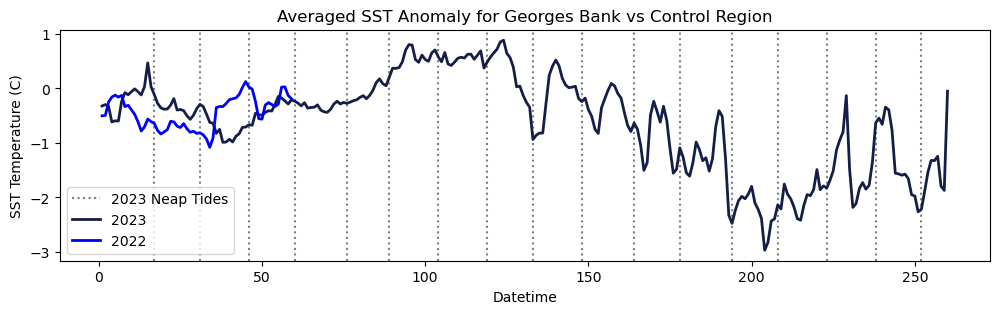

In [14]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("SST Temperature (C)")
ax.set_xlabel("Datetime")
ax.set_title("Averaged SST Anomaly for Georges Bank vs Control Region")

ax.axvline(x=pd.Timestamp(dt2).dayofyear, color='grey', linestyle=':', label='2023 Neap Tides')
ax.axvline(x=pd.Timestamp(dt4).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt6).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt8).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt10).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt12).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt14).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt16).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt18).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt20).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt22).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt24).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt26).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt28).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt30).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt32).dayofyear, color='grey', linestyle=':')
ax.axvline(x=pd.Timestamp(dt34).dayofyear, color='grey', linestyle=':')

ax.plot(sst_result_df_2023.Datetime.dt.dayofyear, sst_result_df_2023.Anomaly, c='#141E46', label='2023', linewidth=2)
ax.plot(sst_result_df_2022.Datetime.dt.dayofyear, sst_result_df_2022.Anomaly, c='blue', label='2022', linewidth=2)


ax.legend()

In [15]:
neap_compare_df = pd.DataFrame(columns=['Datetime', 'ROI', 'Control'])

for i in range(len(neap_tides)):
    
    neap_temp_roi = float(sst_result_df[sst_result_df.Datetime == neap_tides[i]].ROI_SST.values)
    neap_temp_roc = float(sst_result_df[sst_result_df.Datetime == neap_tides[i]].Control_SST.values)
    dt = sst_result_df[sst_result_df.Datetime == spring_tides[i]].Datetime.values[0]
    
    neap_compare_df = neap_compare_df.append({'Datetime': dt, 'ROI': neap_temp_roi, 'Control': neap_temp_roc}, ignore_index=True)

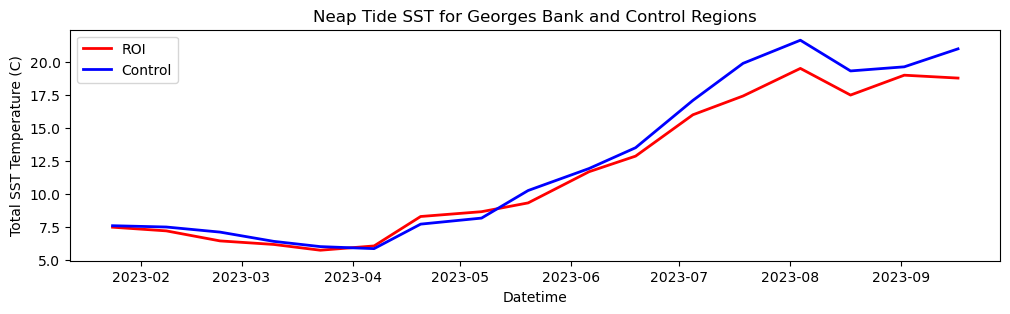

In [16]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("Total SST Temperature (C)")
ax.set_xlabel("Datetime")
ax.set_title("Neap Tide SST for Georges Bank and Control Regions")

ax.plot(neap_compare_df.Datetime, neap_compare_df.ROI, c='red', label='ROI', linewidth=2)
ax.plot(neap_compare_df.Datetime, neap_compare_df.Control, c='blue', label='Control', linewidth=2)

ax.legend()